## Neural Network Models (Supervised)
Known as **Multi-Layer Perceptron (MLP):** The common method for neural networks to learn a function from a training dataset.

What makes neural networks special is that inbetween the input and output layers there are hiden layers.

The leftmost layer is known as the input layer, that consists of *neurons*, representing the input features of the dataset. Into the next hidden layer, each neuron is a weighted sum of all the previous neurons followed by a non-linear activation function g(). Common options for $ g $ are: tanh (hyperbolic tan), logistic $ (1/e^{-z}) $ where $ z = $ the weighted average of all the previous hidden layers, plus a bias $ \beta $.

The Scikit learn module contains public attributes such as coefs_ and intercepts_. 
- coefs_ is a list of weight matrices, representing the weight matrix at index $i$, for the weights between the $i^{th}$ and the $i^{th} + 1$ layer.
- intercepts_ is a list of bias vectors, where the vector at index $ i $ represnets the bias values added to layer $ i + 1 $

## Scikit Learn
### Classification
MPLClassifier implements a multi-layer perceptron algorithm that trains using *backpropagation*

In [1]:
import pandas as pd

In [2]:
water_quality = pd.read_csv('../Class_Data/water quality.csv')

In [3]:
water_quality.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.00,9.80,0.90,2.08,0.040,5.92,0.57,0.03,0.95,0.33,...,0.072,3.55,2.08,0.002,27.82,4.53,0.02,0.11,0.02,No
1,0.05,18.85,0.04,0.73,0.040,0.06,0.00,0.08,0.13,0.00,...,0.132,9.40,0.40,0.006,0.21,4.66,0.00,0.02,0.06,No
2,4.49,3.08,0.01,3.28,0.002,7.43,0.29,1.67,0.47,0.54,...,0.141,4.94,1.64,0.006,45.28,0.80,0.04,0.40,0.03,Yes
3,3.61,21.65,0.24,1.32,0.050,4.80,0.08,1.65,0.03,0.17,...,0.067,6.07,1.69,0.001,24.15,2.73,0.03,0.19,0.00,No
4,0.01,16.13,0.05,0.57,0.070,0.09,0.07,1.14,1.14,0.00,...,0.045,9.14,0.87,0.010,0.14,2.30,0.02,0.05,0.04,Yes


In [87]:
X = water_quality.drop('is_safe', axis=1)
y = water_quality['is_safe'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.neural_network import MLPClassifier

# Be sure to review the different types of solves available
clf = MLPClassifier(
    hidden_layer_sizes=(5, 2),
    activation='logistic',
    # solver='lbfgs',
    max_iter=20000
)
clf.fit(X, y)

In [15]:
[coef.shape for coef in clf.coefs_]

[(20, 5), (5, 2), (2, 1)]

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier

import numpy as np

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ann_classifier', MLPClassifier(
        max_iter=2000,
        activation='logistic'
    ))
])

clf = GridSearchCV(
    estimator=pipe,
    param_grid={
        'ann_classifier__hidden_layer_sizes': 
        [(i,) for i in range(29, 32)],
        'ann_classifier__alpha': 10.0 ** -np.arange(1,7)
    },
    scoring='precision',
    cv=5,
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [90]:
print("Best Validation Score:", clf.best_score_)
print("Best Parameters:", clf.best_params_)

Best Validation Score: 0.8721265587082254
Best Parameters: {'ann_classifier__alpha': np.float64(0.1), 'ann_classifier__hidden_layer_sizes': (29,)}


In [91]:
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay
)

In [92]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))

Accuracy Score: 0.9080604534005038
Precision Score: 0.8754716981132076
Recall Score: 0.8529411764705882


<Figure size 500x500 with 0 Axes>

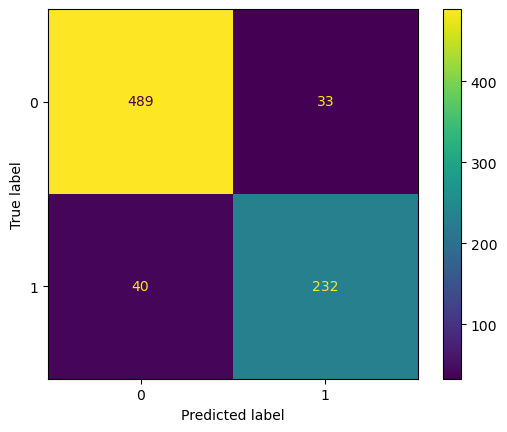

In [93]:
m = confusion_matrix(
    y_test,
    y_pred
)

plt.figure(figsize=(5, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix=m,
    display_labels=clf.classes_
)

disp.plot()

Text(0.5, 1.0, '2.Precision-Recall Curve with (29,) hidden layers')

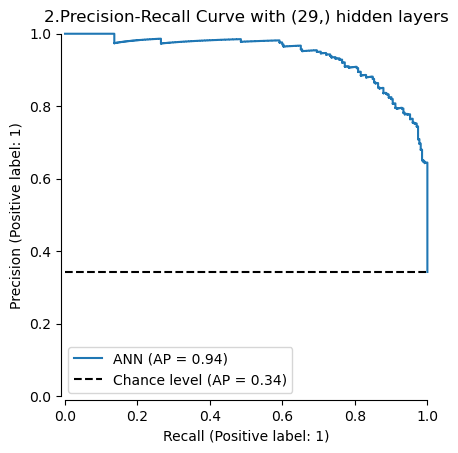

In [94]:
disp = PrecisionRecallDisplay.from_estimator(
    estimator=clf,
    X=X_test,
    y=y_test,
    plot_chance_level=True,
    despine=True,
    name=f'ANN'
)
disp.ax_.set_title(f"2.Precision-Recall Curve with {clf.best_params_['ann_classifier__hidden_layer_sizes']} hidden layers")

<Figure size 500x500 with 0 Axes>

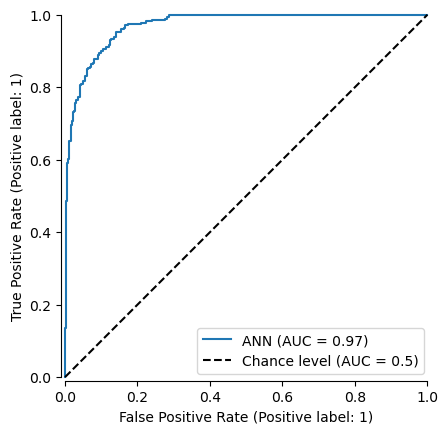

In [95]:
plt.figure(figsize=(5, 5))
disp = RocCurveDisplay.from_estimator(
    estimator=clf,
    X=X_test,
    y=y_test,
    plot_chance_level=True,
    despine=True,
    name=f'ANN'
)

Neural Network Performed marginally better than the SVM in areas of ROC AUC and f2 score. Even though it under performed in precision (the SVM will not give false positives). The Neural Network is a stronger model overall yield a better performance in accuracy and recall.

### Regression

Regression works similarly using the classification operator, instead using **MLPRegressor**.
Internally the difference is the final output layer does not get an activation function applied to it. Hence, it uses the square error as the loss function, and the output is a set of continuous values.

Both of these operators support multi-output regression, meaning a sample can have more than one target.

In [2]:
import pandas as pd
midcity = pd.read_csv('../Class_Data/midcity.csv')

In [49]:
midcity.head()

,Home,Nbhd,Offers,SqFt,Brick,Bedrooms,Bathrooms,Price
0,1,2,2,1790,No,2,2,114300
1,2,2,3,2030,No,4,2,114200
2,3,2,1,1740,No,3,2,114800
3,4,2,3,1980,No,3,2,94700
4,5,2,3,2130,No,3,3,119800


Notes: because we are doing regression, we do not want to use a sigmoid function as our activation function because the final output of each neuron will be between 0 and 1, making it a much worse predictor once the output layer is reached.

**ReLu**, returns the input value if it's greater than 0, and 0 if it is negative. Since our model is dealing with prices, the only good activation function provided by scikit is the identity function.

However, when using the linear activation function, we get a value error as some training fits return nan because the spread of the target is much too large, specially when X is being scaled.

"A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable.

Scaling input and output variables is a critical step in using neural network models." ([Source](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/))

To do so, the output values must be preprocessed, as well as then post-processed so the results are intrepretable.

count       128.000000
mean     130427.343750
std       26868.770371
min       69100.000000
25%      111325.000000
50%      125950.000000
75%      148250.000000
max      211200.000000
Name: Price, dtype: float64

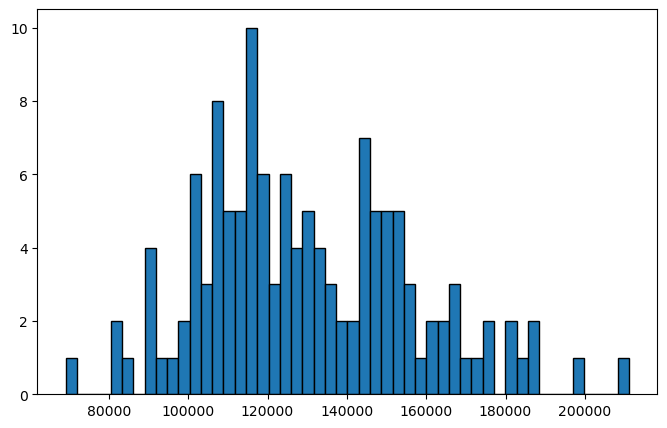

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(
    x=midcity['Price'],
    bins=50,
    edgecolor='black'
)
plt.plot()

midcity['Price'].describe()

In [110]:
import numpy as np

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split

preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='if_binary'), ['Nbhd', 'Brick']),
    ('z-scaler', StandardScaler(), ['SqFt']),
    ('min-max-scaler', MinMaxScaler(), ['Offers', 'Bedrooms', 'Bathrooms'])
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('ann_regressor', MLPRegressor(
        activation='identity',
        learning_rate='constant',
        learning_rate_init=0.001,
        random_state=1992,
        max_iter=2000))
])

clf = GridSearchCV(
    estimator=pipe,
    param_grid={
        'ann_regressor__hidden_layer_sizes': [(i,) for i in range(25, 36)],
        'ann_regressor__solver': [
            'lbfgs', 
            'sgd', 
            'adam'
        ],
        'ann_regressor__alpha': 10.0 ** -np.arange(2,10)
    },
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=5
)

X = midcity.drop(['Home', 'Price'], axis=1)
y = midcity['Price']

# Scaling the y
# reshape converts to 2D array 
# -1 means guess the number of rows
#  1 means one column 
# We are using a MinMax Scaler because it preservers relative differences (and does not yield negative values)
# .ravel() then converts the fitted data back into a 1d array
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_scaled, 
    test_size=0.3,
    random_state=1992)

clf.fit(X_train, y_train)

y_pred_scaled = clf.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [111]:
print("Best Parameters:", clf.best_params_)
print("Validation Score(RMSE):", y_scaler.inverse_transform(np.array(-clf.best_score_).reshape(-1, 1))[0][0])

Best Parameters: {'ann_regressor__alpha': np.float64(0.01), 'ann_regressor__hidden_layer_sizes': (32,), 'ann_regressor__solver': 'lbfgs'}
Validation Score(RMSE): 80089.82566819663


R2 Score: 0.9041154218171326


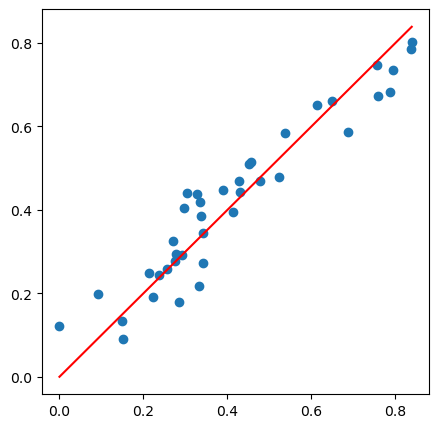

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_scaled)
plt.plot([y_test.max(), y_test.min()], [y_test.max(), y_test.min()], c='r')
print("R2 Score:", r2_score(y_test, y_pred_scaled))
plt.show()

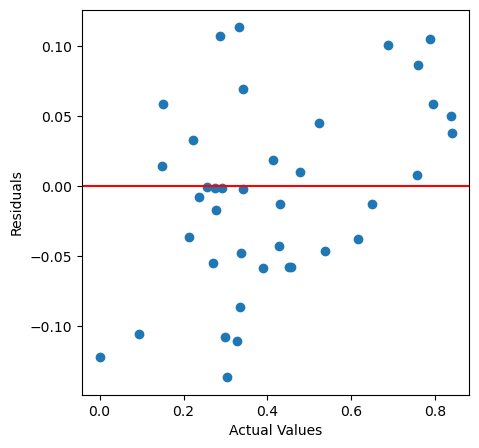

In [114]:
# Residual plot
residuals = y_test - y_pred_scaled

plt.figure(figsize=(5, 5))
plt.scatter(y_test, residuals)
plt.axhline(0, c='r')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

### Notes on Regularization
Both versions of the Multi-Layered Perceptron accept a parameter called alpha. Alpha is your **L2 regularization** term. Increasing this parameter is a great way to combat a model that has high variance as it is made to punish **overfitting** by penalizing weights that have high magnitudes.

The best way to find a suitable parameter $\alpha$ is to use GridSearchCV in the range 10.0 ** -np.arrange(1,7), as you have used in your first example. This led to your strongest classifier in terms of ROC AUC.

### A note on the Algorithms used by back propagation
*These will require their own sections or at the very least their own reading*
Backpropagation happens with 3 algorithms:
- Stochastic Gradient Descent (SGD)
- Adam, or,
- L-BFGS

#### SGD
- Updates parameters using the gradient of the loss function with respect to a parameter that needs adaptation. 
This weight $\omega$ is updated by subtracting a term that is a product of a loss function term, and the learning rate n.

#### Adam
- Similar to SGD it is also a stochastic optimizer. However, Adam can automatically adjust the amount to update parameters based on estimates of lower-order moments.

With both of the algorithms used above, training can be done online and in mini-batch form.

#### L-BFGS
- Approximates the Hessian matrix, this represents the second-order partial derivative of a function. It then approximates the inverse of the Hessian matrix to perform parameter updates. L-BFGS does **not** support online or mini-batch learning.

### Time Complexity of Backpropagation
Let there be:
- $n$ training samples,
- $m$ features,
- $k$ hidden layers, each containing $h$ neurons(for simplicity), and,
- $o$ output neurons,
then the time complexity is
$$
O(i * n * (m * h + (k - 1) * h * h + h * o)),
$$
Where $i$ is the number of iterations (epochs in SGD and Adam).

Evidently, backpropagation has a high time complexity, therefore, it is advisable to begin with the smallest number of hidden neurosn and hidden layers as possible

### Tips
- Always scale your data (much like KNN)
- Use $\alpha$ with GridSearchCV
- It has been observed that L-BFGS converges much faster on small datasets
    - Adam however is more robust and has good performance
    - Lastly, SGD, can perform the best if the learning rate is correctly tuned
- For SGD, if you wanted to manually go through each iteration, you can set warm_start=True, and max_iter=1, to then follow the classifier through each iteration.